In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [11]:
data1 = pd.read_csv('data/data1.csv')
data2 = pd.read_csv('data/data2.csv')
data3 = pd.read_csv('data/data3.csv')
data4 = pd.read_csv('data/data4.csv')

In [12]:
data = pd.concat([data1, data2, data3, data4])

In [13]:
data.columns

Index(['taget', 'rssi', 'A1', 'P1', 'A2', 'P2', 'A3', 'P3', 'A4', 'P4',
       ...
       'A48', 'P48', 'A49', 'P49', 'A50', 'P50', 'A51', 'P51', 'A52', 'P52'],
      dtype='object', length=106)

In [14]:
data['taget'].unique()

array(['applause', 'go', 'jump', 'wave'], dtype=object)

In [15]:
x_df = data.drop(columns=['taget', 'rssi'])
y_df = data.pop('taget')

In [7]:
y_df.shape

(1442,)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x_df,y_df, random_state=1)

In [17]:
X_train.shape

(1081, 104)

In [18]:
Y_train.shape

(1081,)

In [19]:
X_test.shape

(361, 104)

In [20]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(Y_train)
y_test = encoder.fit_transform(Y_test)

print(y_train.shape)
print(y_test.shape)

(1081,)
(361,)


In [21]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

print(x_train.shape)
print(x_test.shape)

(1081, 104)
(361, 104)


In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(104, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train,batch_size = 2, epochs= 100, validation_data=(x_test, y_test))

Epoch 1/100
541/541 [==============================] - 2s 2ms/step - loss: 1.2866 - accuracy: 0.2960 - val_loss: 1.2521 - val_accuracy: 0.3435
Epoch 2/100
541/541 [==============================] - 1s 1ms/step - loss: 1.2337 - accuracy: 0.3219 - val_loss: 1.1966 - val_accuracy: 0.3740
Epoch 3/100
541/541 [==============================] - 1s 1ms/step - loss: 1.2061 - accuracy: 0.3534 - val_loss: 1.2229 - val_accuracy: 0.3657
Epoch 4/100
541/541 [==============================] - 1s 1ms/step - loss: 1.1894 - accuracy: 0.3673 - val_loss: 1.1964 - val_accuracy: 0.3823
Epoch 5/100
541/541 [==============================] - 1s 1ms/step - loss: 1.1737 - accuracy: 0.3839 - val_loss: 1.1594 - val_accuracy: 0.3878
Epoch 6/100
541/541 [==============================] - 1s 1ms/step - loss: 1.1808 - accuracy: 0.3802 - val_loss: 1.1846 - val_accuracy: 0.3573
Epoch 7/100
541/541 [==============================] - 1s 1ms/step - loss: 1.1728 - accuracy: 0.3802 - val_loss: 1.1751 - val_accuracy: 0.3795

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               10920     
                                                                 
 dense_1 (Dense)             (None, 64)                6720      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 19,852
Trainable params: 19,852
Non-trainable params: 0
_________________________________________________________________


In [26]:
accuracy = history.history['accuracy']

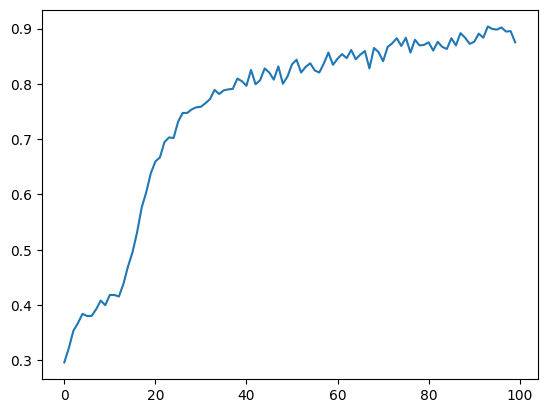

In [27]:
plt.plot(accuracy)

In [28]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [29]:
x_test[0]

array([0.625     , 0.        , 0.6       , 0.        , 0.6097561 ,
       0.        , 0.6       , 0.        , 0.58974359, 0.        ,
       0.56410256, 0.        , 0.55263158, 0.        , 0.57894737,
       0.        , 0.55555556, 0.        , 0.51351351, 0.        ,
       0.52631579, 0.        , 0.53846154, 0.        , 0.525     ,
       0.        , 0.51282051, 0.        , 0.52631579, 0.        ,
       0.5       , 0.        , 0.475     , 0.        , 0.48648649,
       0.        , 0.5       , 0.        , 0.52777778, 0.02702703,
       0.54054054, 0.        , 0.48648649, 0.        , 0.45945946,
       0.        , 0.44736842, 0.        , 0.45      , 0.        ,
       0.475     , 0.        , 0.42857143, 0.02439024, 0.45454545,
       0.04651163, 0.40909091, 0.04545455, 0.43181818, 0.02325581,
       0.42857143, 0.02380952, 0.45238095, 0.02325581, 0.44186047,
       0.02325581, 0.45454545, 0.04545455, 0.44897959, 0.06521739,
       0.44      , 0.08333333, 0.45833333, 0.08333333, 0.47916